"二维数组"Dataframe：是一个表格型的数据结构，包含一组有序的列，其列的值类型可以是数值、字符串、布尔值等。

Dataframe中的数据以一个或多个二维块存放，不是列表、字典或一维数组结构。

In [1]:
import numpy as np
import pandas as pd  
# 导入numpy、pandas模块

In [2]:
# Dataframe 数据结构
# Dataframe是一个表格型的数据结构，“带有标签的二维数组”。
# Dataframe带有index（行标签）和columns（列标签）

data = {'name':['Jack','Tom','Mary'],
        'age':[18,19,20],
       'gender':['m','m','w']}
frame = pd.DataFrame(data)
print(frame)  
print(type(frame))
print(frame.index,'\n该数据类型为：',type(frame.index))
print(frame.columns,'\n该数据类型为：',type(frame.columns))
print(frame.values,'\n该数据类型为：',type(frame.values))
# 查看数据，数据类型为dataframe
# .index查看行标签
# .columns查看列标签
# .values查看值，数据类型为ndarray

   age gender  name
0   18      m  Jack
1   19      m   Tom
2   20      w  Mary
<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=3, step=1) 
该数据类型为： <class 'pandas.core.indexes.range.RangeIndex'>
Index(['age', 'gender', 'name'], dtype='object') 
该数据类型为： <class 'pandas.core.indexes.base.Index'>
[[18 'm' 'Jack']
 [19 'm' 'Tom']
 [20 'w' 'Mary']] 
该数据类型为： <class 'numpy.ndarray'>


In [11]:
# Dataframe 创建方法一：由数组/list组成的字典
# 创建方法:pandas.Dataframe()

data1 = {'a':[1,2,3],
        'b':[3,4,5],
        'c':[5,6,7]}
data2 = {'one':np.random.rand(3),
        'two':np.random.rand(3)}   # 这里如果尝试  'two':np.random.rand(4) 会怎么样？
print(data1)
print(data2)
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1)
print(df2)
# 由数组/list组成的字典 创建Dataframe，columns为字典key，index为默认数字标签
# 字典的值的长度必须保持一致！

df1 = pd.DataFrame(data1, columns = ['b','c','a','d'])
print(df1)
df1 = pd.DataFrame(data1, columns = ['b','c'])
print(df1)
# columns参数：可以重新指定列的顺序，格式为list，如果现有数据中没有该列（比如'd'），则产生NaN值
# 如果columns重新指定时候，列的数量可以少于原数据

df2 = pd.DataFrame(data2, index = ['f1','f2','f3'])  # 这里如果尝试  index = ['f1','f2','f3','f4'] 会怎么样？
# df2 = pd.DataFrame(data2, index = ['f1','f2','f3', 'f4'])  # 报错
print(df2)
# index参数：重新定义index，格式为list，长度必须保持一致

{'a': [1, 2, 3], 'b': [3, 4, 5], 'c': [5, 6, 7]}
{'one': array([ 0.72071753,  0.90799808,  0.46617226]), 'two': array([ 0.89001516,  0.4424294 ,  0.05365677])}
   a  b  c
0  1  3  5
1  2  4  6
2  3  5  7
        one       two
0  0.720718  0.890015
1  0.907998  0.442429
2  0.466172  0.053657
   b  c  a    d
0  3  5  1  NaN
1  4  6  2  NaN
2  5  7  3  NaN
   b  c
0  3  5
1  4  6
2  5  7
         one       two
f1  0.720718  0.890015
f2  0.907998  0.442429
f3  0.466172  0.053657


In [4]:
# Dataframe 创建方法二：由Series组成的字典

data1 = {'one':pd.Series(np.random.rand(2)),
        'two':pd.Series(np.random.rand(3))}  # 没有设置index的Series
data2 = {'one':pd.Series(np.random.rand(2), index = ['a','b']),
        'two':pd.Series(np.random.rand(3),index = ['a','b','c'])}  # 设置了index的Series
print(data1)
print(data2)
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1)
print(df2)
# 由Seris组成的字典 创建Dataframe，columns为字典key，index为Series的标签（如果Series没有指定标签，则是默认数字标签）
# Series可以长度不一样，生成的Dataframe会出现NaN值

{'one': 0    0.975369
1    0.423177
dtype: float64, 'two': 0    0.465114
1    0.274600
2    0.731520
dtype: float64}
{'one': a    0.727031
b    0.147126
dtype: float64, 'two': a    0.517213
b    0.201783
c    0.591171
dtype: float64}
        one       two
0  0.975369  0.465114
1  0.423177  0.274600
2       NaN  0.731520
        one       two
a  0.727031  0.517213
b  0.147126  0.201783
c       NaN  0.591171


In [13]:
# Dataframe 创建方法三：通过二维数组直接创建

ar = np.random.rand(9).reshape(3,3)
print(ar)
df1 = pd.DataFrame(ar)
df2 = pd.DataFrame(ar, index = ['a', 'b', 'c'], columns = ['one','two','three'])  # 可以尝试一下index或columns长度不等于已有数组的情况
# df3 = pd.DataFrame(ar, index = ['a', 'b', 'c', 'd'], columns = ['one', 'two', 'three', 'four']) # 报错
print(df1)
print(df2)
# 通过二维数组直接创建Dataframe，得到一样形状的结果数据，如果不指定index和columns，两者均返回默认数字格式
# index和colunms指定长度与原数组保持一致

[[ 0.04831005  0.20081171  0.22906158]
 [ 0.61907416  0.19476909  0.1599898 ]
 [ 0.68896261  0.49792216  0.11877515]]
          0         1         2
0  0.048310  0.200812  0.229062
1  0.619074  0.194769  0.159990
2  0.688963  0.497922  0.118775
        one       two     three
a  0.048310  0.200812  0.229062
b  0.619074  0.194769  0.159990
c  0.688963  0.497922  0.118775


######## 课后小练习,请查看 “pandas课程作业.docx”  ########

作业1：用三种不同的方法，创建以下Dataframe（保证columns和index一致，值不做要求）
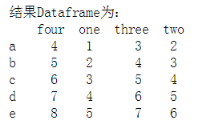

In [6]:
# by dict
df1 = pd.DataFrame({'one': [1, 2, 3, 4, 5],
                   'two': [2, 3, 4, 5, 6],
                   'three': [3, 4, 5, 6, 7],
                   'four': [4, 5, 6, 7, 8]},
                   index = ['a', 'b', 'c', 'd', 'e'])
df1

,four,one,three,two
a,4,1,3,2
b,5,2,4,3
c,6,3,5,4
d,7,4,6,5
e,8,5,7,6


In [7]:
# by serious
data = {'one':pd.Series([1, 2, 3, 4, 5], index=['a','b','c','d','e']),
        'two':pd.Series([2, 3, 4, 5, 6], index=['a','b', 'c','d','e']),
        'three':pd.Series([3, 4, 5, 6, 7], index=['a','b','c','d','e']),
         'four':pd.Series([4, 5, 6, 7, 8], index=['a','b','c','d','e']),
        }
print(data)

{'one': a    1
b    2
c    3
d    4
e    5
dtype: int64, 'two': a    2
b    3
c    4
d    5
e    6
dtype: int64, 'three': a    3
b    4
c    5
d    6
e    7
dtype: int64, 'four': a    4
b    5
c    6
d    7
e    8
dtype: int64}


In [8]:
df2 = pd.DataFrame(data)
df2

,four,one,three,two
a,4,1,3,2
b,5,2,4,3
c,6,3,5,4
d,7,4,6,5
e,8,5,7,6


In [9]:
# by Two-dimensional array
df3 = pd.DataFrame(np.arange(20).reshape(5, 4), 
                  index = ['a', 'b', 'c', 'd', 'e'],
                  columns = ['one', 'two', 'three', 'four'])
df3

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19
